### Practice Project - 5

   # Titanic Project

### Problem Statement:


The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. 
 
 It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
 
 Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

## Importing libraries :-

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore') 

In [2]:
data=pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

# Exploratory Data Analysis 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

1. 177 null values are present in Age column.
2. 687 null values are present in Cabin column.
2. 2 null values are present in Embarked column.

In [6]:
data.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Arround 19.86% data in Age column is null value.

77.10% data in Cabin column is null value.

0.22% data in Embarked column is null value.

In [7]:
(data.Parch == 0).sum()

678

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Survived', ylabel='count'>

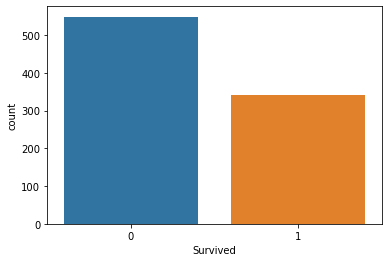

In [9]:
sns.countplot(x='Survived',data=data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

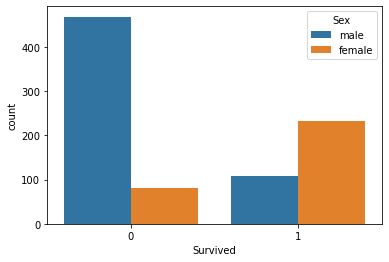

In [10]:
sns.countplot(x='Survived',hue='Sex',data=data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

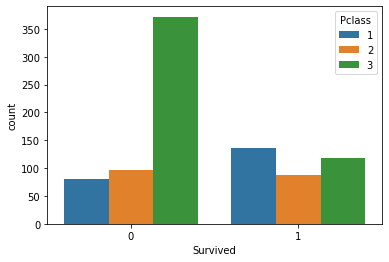

In [11]:
sns.countplot(x='Survived',hue='Pclass',data=data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

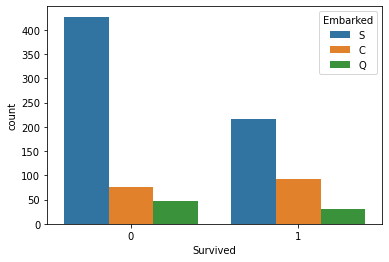

In [12]:
sns.countplot(x='Survived',hue='Embarked',data=data)

<AxesSubplot:xlabel='Parch', ylabel='count'>

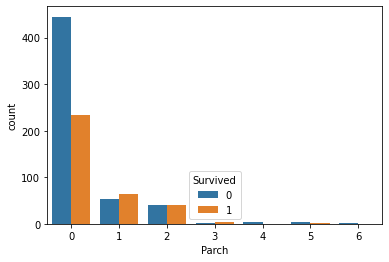

In [13]:
sns.countplot(x='Parch',hue='Survived',data=data)

In [14]:
col=[]
col.append(data.columns)
col

[Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object')]

<AxesSubplot:>

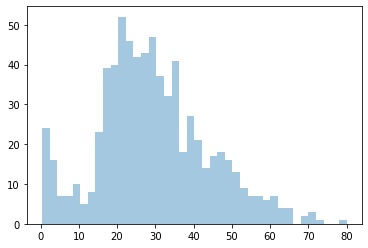

In [15]:
sns.distplot(x=data.Age,kde=False,bins=40)

# Data cleaning

Filling null values of age column 

In [16]:
def impute_nan(data,variable,median):
    data[variable+"_median"]=data[variable].fillna(median)
    data[variable+"_random"]=data[variable]

    random_sample=data[variable].dropna().sample(data[variable].isnull().sum(),random_state=0)

    random_sample.index=data[data[variable].isnull()].index
    data.loc[data[variable].isnull(),variable+'_random']=random_sample

In [17]:
median=data.Age.median()
median

28.0

In [18]:
impute_nan(data,"Age",median)

In [19]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median,Age_random
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,27.0,27.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,19.0,19.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,28.0,15.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,26.0,26.0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,32.0,32.0


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

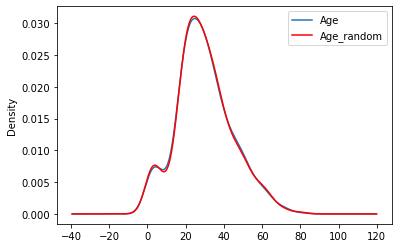

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
data['Age'].plot(kind='kde', ax=ax)

data.Age_random.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [22]:
data=data.drop(columns=['Age','Age_median'])
data.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_random
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,35.0


In [23]:
data.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
Age_random      0.000000
dtype: float64

In [24]:
#data["Cabin"]=data["Cabin"].apply(lambda x: 1 if x!=0 else 0)
#data["Cabin"]

In [25]:
print(data[['Cabin','Survived']].groupby(['Cabin'],as_index=False).mean().sort_values(by='Survived',ascending=False))

       Cabin  Survived
73   C62 C64       1.0
97       D21       1.0
94       D17       1.0
95       D19       1.0
60      C148       1.0
..       ...       ...
67       C46       0.0
64       C30       0.0
59      C128       0.0
56      C124       0.0
146        T       0.0

[147 rows x 2 columns]


In [26]:
data["Cabin"][~data["Cabin"].isnull()] = 1  # not nan
data["Cabin"][data["Cabin"].isnull()] = 0

In [27]:
data["Cabin"].value_counts()

0    687
1    204
Name: Cabin, dtype: int64

In [28]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_random
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,0,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,1,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,0,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,1,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,0,S,35.0


<AxesSubplot:xlabel='Survived', ylabel='count'>

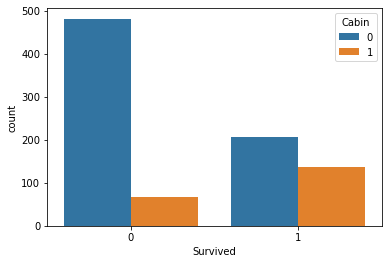

In [29]:
sns.countplot(x='Survived',hue='Cabin',data=data)

In [30]:
data[data['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_random
61,62,1,1,"Icard, Miss. Amelie",female,0,0,113572,80.0,1,NaN,38.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,0,0,113572,80.0,1,NaN,62.0


In [31]:
data=data.dropna()

In [32]:
print(data[['Cabin','Survived']].groupby(['Cabin'],as_index=False).mean().sort_values(by='Survived',ascending=False))

   Cabin  Survived
1      1  0.663366
0      0  0.299854


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Ticket       889 non-null    object 
 8   Fare         889 non-null    float64
 9   Cabin        889 non-null    object 
 10  Embarked     889 non-null    object 
 11  Age_random   889 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


###  no null values

In [34]:
data=data.drop(columns=['PassengerId','Name','Ticket'])
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Age_random
0,0,3,male,1,0,7.2500,0,S,22.0
1,1,1,female,1,0,71.2833,1,C,38.0
2,1,3,female,0,0,7.9250,0,S,26.0
3,1,1,female,1,0,53.1000,1,S,35.0
4,0,3,male,0,0,8.0500,0,S,35.0


In [35]:
data['Sex'].value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [36]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [37]:
data['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['Embarked', 'Sex']
data[cols]=data[cols].apply(le.fit_transform)

In [39]:
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Age_random
0,0,3,1,1,0,7.2500,0,2,22.0
1,1,1,0,1,0,71.2833,1,0,38.0
2,1,3,0,0,0,7.9250,0,2,26.0
3,1,1,0,1,0,53.1000,1,2,35.0
4,0,3,1,0,0,8.0500,0,2,35.0


In [40]:
data.shape

(889, 9)

<AxesSubplot:>

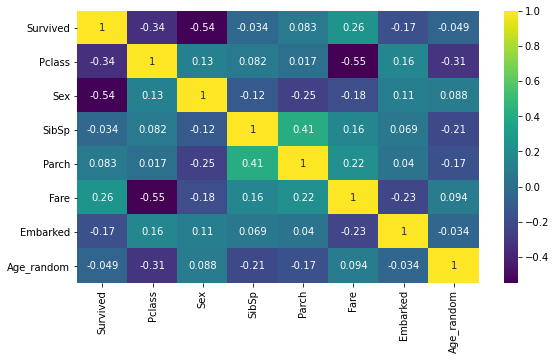

In [41]:
plt.figure(figsize=(9,5))
sns.heatmap(data.corr(), vmax=1,annot=True,cmap='viridis')

<AxesSubplot:>

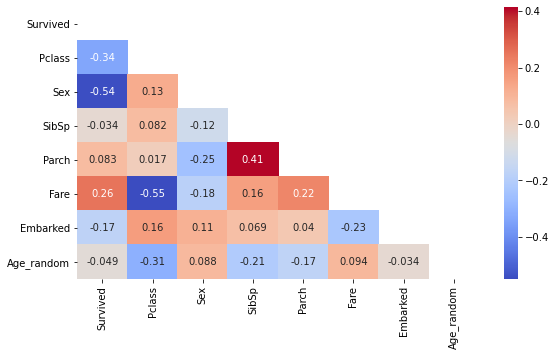

In [42]:
plt.figure(figsize=(9,5))
sns.heatmap(data.corr(),cmap='coolwarm',annot=True,mask= np.triu(data.corr()))

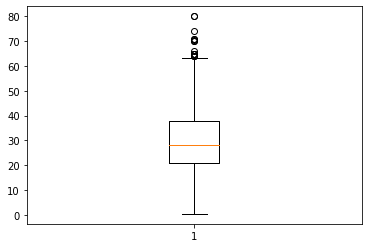

In [43]:
plt.boxplot(data['Age_random'])
plt.show()

In [44]:
q=data['Age_random'].quantile(.98)
data=data[data['Age_random']<q]

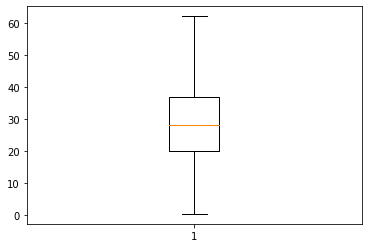

In [45]:
plt.boxplot(data['Age_random'])
plt.show()

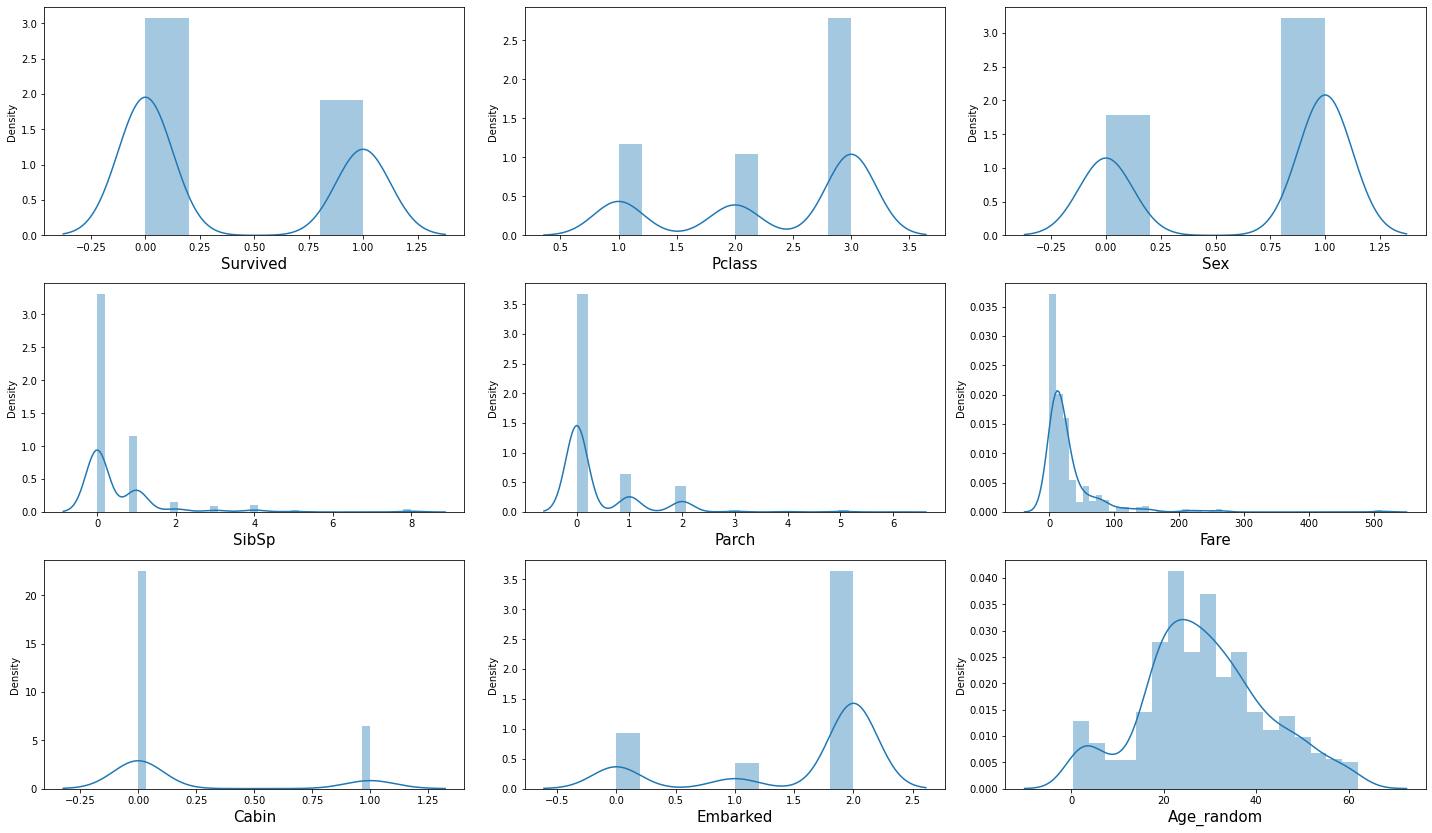

In [46]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for i in data:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(data[i])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [47]:
data.skew()

Survived      0.478240
Pclass       -0.664589
Sex          -0.606303
SibSp         3.657719
Parch         2.724463
Fare          4.929300
Cabin         1.333284
Embarked     -1.285182
Age_random    0.151389
dtype: float64

In [48]:
x=data.drop(['Survived','Fare'],axis=1)
y=data.Survived

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

x_scale=scaler.fit_transform(x)
x=pd.DataFrame(x_scale,columns=x.columns)
x

,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Age_random
0,1.0,1.0,0.125,0.000000,0.0,1.0,0.350438
1,0.0,0.0,0.125,0.000000,1.0,0.0,0.610263
2,1.0,0.0,0.000,0.000000,0.0,1.0,0.415395
3,0.0,0.0,0.125,0.000000,1.0,1.0,0.561546
4,1.0,1.0,0.000,0.000000,0.0,1.0,0.561546
...,...,...,...,...,...,...,...
865,0.5,1.0,0.000,0.000000,0.0,1.0,0.431634
866,0.0,0.0,0.000,0.000000,1.0,1.0,0.301721
867,1.0,0.0,0.125,0.333333,0.0,1.0,0.236765
868,0.0,1.0,0.000,0.000000,1.0,0.0,0.415395


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,plot_roc_curve

In [51]:
maxacc=0
maxrs=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i) 
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc= accuracy_score(y_test,pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('max accuracy score:',maxacc*100,'\nmax random state:',maxrs)

max accuracy score: 87.61467889908256 
max random state: 16


In [52]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=maxrs) 

In [53]:
# LogisticRegression model  
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print('--------------------------LogisticRegression------------------')
print(f'\naccuracy score:{accuracy_score(y_test,pred)*100:.2f}%')
print(f'\nclassification report:\n\n{classification_report(y_test,pred)}')
print(f'confusioon matrix:\n\n{confusion_matrix(y_test,pred)}')

--------------------------LogisticRegression------------------

accuracy score:87.61%

classification report:

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       139
           1       0.84      0.81      0.83        79

    accuracy                           0.88       218
   macro avg       0.87      0.86      0.86       218
weighted avg       0.88      0.88      0.88       218

confusioon matrix:

[[127  12]
 [ 15  64]]


In [54]:
# decisiontree classifier model  
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print('--------------------------Decision Tree Classifier------------------')
print(f'\naccuracy score:{accuracy_score(y_test,pred)*100:.2f}%')
print(f'\nclassification report:\n\n{classification_report(y_test,pred)}')
print(f'confusioon matrix:\n\n{confusion_matrix(y_test,pred)}')

--------------------------Decision Tree Classifier------------------

accuracy score:78.90%

classification report:

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       139
           1       0.69      0.76      0.72        79

    accuracy                           0.79       218
   macro avg       0.77      0.78      0.78       218
weighted avg       0.80      0.79      0.79       218

confusioon matrix:

[[112  27]
 [ 19  60]]


In [55]:
# KNeighbors Classifier model
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)
pred=knc.predict(x_test)
print('--------------------------KNeighbors Classifier------------------')
print(f'\naccuracy score:{accuracy_score(y_test,pred)*100:.2f}%')
print(f'\nclassification report:\n\n{classification_report(y_test,pred)}')
print(f'confusioon matrix:\n\n{confusion_matrix(y_test,pred)}')

--------------------------KNeighbors Classifier------------------

accuracy score:86.70%

classification report:

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       139
           1       0.84      0.78      0.81        79

    accuracy                           0.87       218
   macro avg       0.86      0.85      0.85       218
weighted avg       0.87      0.87      0.87       218

confusioon matrix:

[[127  12]
 [ 17  62]]


In [56]:
# Support Vector Classifier model
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print('--------------------------Support Vector Classifier------------------')
print(f'\naccuracy score:{accuracy_score(y_test,pred)*100:.2f}%')
print(f'\nclassification report:\n\n{classification_report(y_test,pred)}')
print(f'confusioon matrix:\n\n{confusion_matrix(y_test,pred)}')

--------------------------Support Vector Classifier------------------

accuracy score:89.45%

classification report:

              precision    recall  f1-score   support

           0       0.87      0.99      0.92       139
           1       0.97      0.73      0.83        79

    accuracy                           0.89       218
   macro avg       0.92      0.86      0.88       218
weighted avg       0.90      0.89      0.89       218

confusioon matrix:

[[137   2]
 [ 21  58]]


In [57]:
# RandomForest Classifier model
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
print('--------------------------RandomForest Classifier------------------')
print(f'\naccuracy score:{accuracy_score(y_test,pred)*100:.2f}%')
print(f'\nclassification report:\n\n{classification_report(y_test,pred)}')
print(f'confusioon matrix:\n\n{confusion_matrix(y_test,pred)}')

--------------------------RandomForest Classifier------------------

accuracy score:81.65%

classification report:

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       139
           1       0.72      0.80      0.76        79

    accuracy                           0.82       218
   macro avg       0.80      0.81      0.81       218
weighted avg       0.82      0.82      0.82       218

confusioon matrix:

[[115  24]
 [ 16  63]]


In [58]:
# AdaBoost Classifier model
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
pred=abc.predict(x_test)
print('--------------------------AdaBoost Classifier------------------')
print(f'\naccuracy score:{accuracy_score(y_test,pred)*100:.2f}%')
print(f'\nclassification report:\n\n{classification_report(y_test,pred)}')
print(f'confusioon matrix:\n\n{confusion_matrix(y_test,pred)}')

--------------------------AdaBoost Classifier------------------

accuracy score:85.32%

classification report:

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       139
           1       0.79      0.81      0.80        79

    accuracy                           0.85       218
   macro avg       0.84      0.84      0.84       218
weighted avg       0.85      0.85      0.85       218

confusioon matrix:

[[122  17]
 [ 15  64]]


In [59]:
m=[lr,dtc,knc,svc,rfc,abc] 
for i in m:
    scr_=cross_val_score(i,x,y,cv=10)
    print('----------',i,'------------')
    print(f'cross validation score:{scr_.mean()*100:.2f}')

---------- LogisticRegression() ------------
cross validation score:79.43
---------- DecisionTreeClassifier() ------------
cross validation score:77.13
---------- KNeighborsClassifier() ------------
cross validation score:78.05
---------- SVC() ------------
cross validation score:80.92
---------- RandomForestClassifier() ------------
cross validation score:78.39
---------- AdaBoostClassifier() ------------
cross validation score:80.57


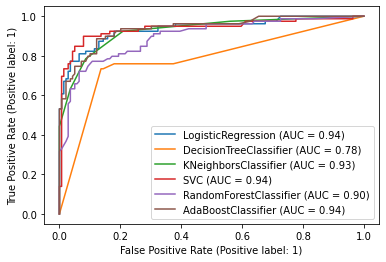

In [60]:
# comparing models
disp=plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(dtc,x_test,y_test,ax=disp.ax_) # ax_ = axes with confusion matrix , use to combine one model to others
plot_roc_curve(knc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(abc,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right') 
plt.show()

In [61]:
parameters={
    'criterion':['entropy','gini'],
    'max_depth':[7,10,11],
    'min_samples_split':[7,10,11],
    'min_samples_leaf':[5,6,7]}

gs=GridSearchCV(dtc,parameters)
gs.fit(x_train,y_train)
print('\n--------------------------Decision Classifier Hyperparameter Tuning------------------')
print('best estimators:\n',gs.best_estimator_)

dtc_=gs.best_estimator_ # direct applying best estimators
dtc_.fit(x_train,y_train)
pred=dtc_.predict(x_test)
print(f'\n\naccuracy score:{accuracy_score(y_test,pred)*100:.2f}%\n')
print(f'\nconfusion_matrix:\n{confusion_matrix(y_test,pred)}\n')
print(f'\nclassification_report:\n{pd.DataFrame(classification_report(y_test,pred,output_dict=True))}')


--------------------------Decision Classifier Hyperparameter Tuning------------------
best estimators:
 DecisionTreeClassifier(max_depth=10, min_samples_leaf=6, min_samples_split=7)


accuracy score:88.07%


confusion_matrix:
[[129  10]
 [ 16  63]]


classification_report:
                    0          1  accuracy   macro avg  weighted avg
precision    0.889655   0.863014  0.880734    0.876334      0.880001
recall       0.928058   0.797468  0.880734    0.862763      0.880734
f1-score     0.908451   0.828947  0.880734    0.868699      0.879640
support    139.000000  79.000000  0.880734  218.000000    218.000000


In [ ]:
# saving best model
import pickle
filename='titanic_new.pkl'
pickle.dump(dtc_,open(filename,'wb'))